# MiniProject 1: Regressions
### How to run this notebook
- Run all cells in order using _"Run All"_ in the Cell menu
- If you wish to re-run a cell, you must re-run all cells in order after restarting the kernel

- In certain cases, if the output of a cell is too large, you can click the _"Open full output data in text editor"_ button to view it. 

### Introduction
Linear regression was the first type of regression analysis to be studied rigorously, and to be
used extensively in many applications. This is because models which depend linearly on their
unknown parameters are easier to fit than models which are non-linearly related to their
parameters and because the statistical properties of the resulting estimators are easier to
determine.


Logistic regression is a classification algorithm used to assign observations to a discrete set of
classes. Unlike linear regression which outputs continuous number values, logistic regression
transforms its output using the logistic sigmoid function to return a probability value which can
then be mapped to two or more discrete classes.

This project contains two parts:
- Part A: Linear Regression
- Part B: Logistic Regression

## Part A : Linear Regression


### Loading the dataset and libraries

In [1]:
import   numpy   as   np 
import  pandas   as   pd
import sklearn
import warnings 
from   sklearn.model_selection   import   train_test_split
from   sklearn.datasets   import   load_boston
from   sklearn.model_selection   import   KFold
## Avoid printing out warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    X, y = load_boston(return_X_y=True)
boston_dataset   =   load_boston ()
pd_dataset = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
pd_dataset['MEDV'] = boston_dataset.target
# pd_dataset = np.c_[np.ones(pd_dataset.shape[0]), pd_dataset]

/Users/soumenmohanty/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

### Exploring the dataset

In [2]:
pd_dataset.head()
print(boston_dataset.DESCR)
pd_dataset.corr()

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot: >

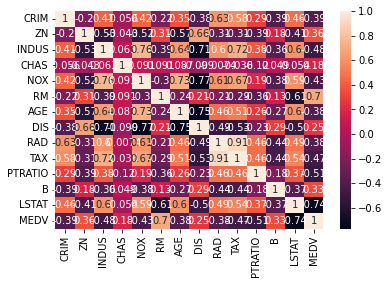

In [3]:
import seaborn as sns
sns.heatmap(pd_dataset.corr(), annot=True)

- Dividing the data into training and testing sets
- Adding a column of ones to the training and testing data to account for the bias term

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

### Closed form solution (using normal equation) and K fold cross validation

In [5]:
def closed_form_solution(X, y):
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

def rmse(y, y_pred):
    rmse = np.sqrt(np.mean((y - y_pred)**2))
    return rmse

def predict(X, theta):
    y_pred = X.dot(theta)
    return y_pred

kf = KFold(n_splits=10)
kf.get_n_splits(pd_dataset)

folds = []
for train_index, test_index in kf.split(pd_dataset):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    folds.append((X_train, X_test, y_train, y_test))

test_rmse = []
train_rmse = []
for fold in folds:
    X_train, X_test, y_train, y_test = fold
    theta = closed_form_solution(X_train, y_train)
    y_pred_test = predict(X_test,theta)
    y_pred_train = predict(X_train,theta)
    test_rmse.append(rmse(y_test, y_pred_test))
    train_rmse.append(rmse(y_train, y_pred_train))

print(f"Average RMSE for training set: {np.mean(train_rmse)}")
print(f"Average RMSE for testing set: {np.mean(test_rmse)}")

Average RMSE for training set: 4.853968178153343
Average RMSE for testing set: 4.935826954499208


### Ridge Regression Model and finding the best Lambda using K fold cross validation 

In [6]:
lam = np.logspace(1, 7, num=13)

def ridge_regression(X, y, l):
    theta = np.linalg.inv(X.T.dot(X) + l * np.identity(X.shape[1])).dot(X.T).dot(y)
    return theta

best_lam = 0
error_dict = {}
for l in lam:
    test_rmse = []
    train_rmse = []
    for fold in folds:
        X_train, X_test, y_train, y_test = fold
        theta = ridge_regression(X_train, y_train, l)
        y_pred_test = predict(X_test,theta)
        y_pred_train = predict(X_train,theta)
        test_rmse.append(rmse(y_test, y_pred_test))
        train_rmse.append(rmse(y_train, y_pred_train))
    error_dict[l] = (np.mean(test_rmse), np.mean(train_rmse))

best_lam = min(error_dict, key=error_dict.get)
print(f"Best lambda: {best_lam}")

print(f"Average RMSE for training set: {error_dict[best_lam][1]}")
print(f"Average RMSE for testing set: {error_dict[best_lam][0]}")



Best lambda: 10.0
Average RMSE for training set: 4.867837310403628
Average RMSE for testing set: 4.893415024223625


### Ridge Regression through Polynomial Transformation of degree 2

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

folds = []
for train_index, test_index in kf.split(pd_dataset):
    X_train, X_test = X_poly[train_index], X_poly[test_index]
    y_train, y_test = y[train_index], y[test_index]
    folds.append((X_train, X_test, y_train, y_test))

for l in lam:
    test_rmse = []
    train_rmse = []
    for fold in folds:
        X_train, X_test, y_train, y_test = fold
        theta = ridge_regression(X_train, y_train, l)
        y_pred_test = predict(X_test,theta)
        y_pred_train = predict(X_train,theta)
        test_rmse.append(rmse(y_test, y_pred_test))
        train_rmse.append(rmse(y_train, y_pred_train))
    error_dict[l] = (np.mean(test_rmse), np.mean(train_rmse))

best_lam = min(error_dict, key=error_dict.get)
print(f"Best lambda: {best_lam}")

print(f"Average RMSE for training set: {np.mean(train_rmse)}")
print(f"Average RMSE for testing set: {np.mean(test_rmse)}")


Best lambda: 1000000.0
Average RMSE for training set: 4.601202347934759
Average RMSE for testing set: 6.272786984866748


### Multivariate Linear Regression using Gradient Descent 

In [8]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler

cost_list = []
def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = y_pred - y
        cost = np.sum((y_pred - y)**2)/m
        cost_list.append(cost)
        gradient = (2/m) * X.T.dot(error)
        theta = theta - alpha * gradient
    return theta

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

folds = []
for train_index, test_index in kf.split(pd_dataset):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    folds.append((X_train, X_test, y_train, y_test))

for fold in folds:
    X_train, X_test, y_train, y_test = fold
    theta = gradient_descent(X_train, y_train, np.zeros(X_train.shape[1]), 0.1, 1000)
    y_pred_test = predict(X_test,theta)
    y_pred_train = predict(X_train,theta)
    test_rmse.append(rmse(y_test, y_pred_test))
    train_rmse.append(rmse(y_train, y_pred_train))

print(f"Average RMSE for training set: {np.mean(train_rmse)}")
print(f"Average RMSE for testing set: {np.mean(test_rmse)}")


Average RMSE for training set: 4.605134632955023
Average RMSE for testing set: 5.726817225736392


### Gradient Descent with Ridge Regularization

In [9]:
def gradient_descent_ridge(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = y_pred - y
        cost = np.sum((y_pred - y)**2)/m
        cost_list.append(cost)
        gradient = (2/m) * X.T.dot(error) + (alpha * theta)
        theta = theta - alpha * gradient
    return theta

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

folds = []
for train_index, test_index in kf.split(pd_dataset):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    folds.append((X_train, X_test, y_train, y_test))

alpha = 0.1
iterations = 1000

for fold in folds:
    X_train, X_test, y_train, y_test = fold
    theta = gradient_descent_ridge(X_train, y_train, np.random.rand(X_train.shape[1]), alpha, iterations)
    y_pred_test = predict(X_test,theta)
    y_pred_train = predict(X_train,theta)
    test_rmse.append(rmse(y_test, y_pred_test))
    train_rmse.append(rmse(y_train, y_pred_train))

print(f"Average RMSE for training set: {np.mean(train_rmse)}")
print(f"Average RMSE for testing set: {np.mean(test_rmse)}")



Average RMSE for training set: 4.66089394770241
Average RMSE for testing set: 5.559992326789697


### Gradient Descent with Lasso Regularization

In [10]:
def gradient_descent_lasso(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = y_pred - y
        cost = np.sum((y_pred - y)**2)/m
        cost_list.append(cost)
        gradient = (2/m) * X.T.dot(error) + (alpha * np.sign(theta))
        theta = theta - alpha * gradient
    return theta

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

folds = []
for train_index, test_index in kf.split(pd_dataset):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    folds.append((X_train, X_test, y_train, y_test))

alpha = 0.1
iterations = 1000

for fold in folds:
    X_train, X_test, y_train, y_test = fold
    theta = gradient_descent_lasso(X_train, y_train, np.random.rand(X_train.shape[1]), alpha, iterations)
    y_pred_test = predict(X_test,theta)
    y_pred_train = predict(X_train,theta)
    test_rmse.append(rmse(y_test, y_pred_test))
    train_rmse.append(rmse(y_train, y_pred_train))

print(f"Average RMSE for training set: {np.mean(train_rmse)}")
print(f"Average RMSE for testing set: {np.mean(test_rmse)}")


Average RMSE for training set: 4.6516054915838065
Average RMSE for testing set: 5.4451352771730495


### Gradient Descent with Elastic Net Regularization

In [11]:
def gradient_descent_elastic(X, y, theta, alpha, iterations):
    m = len(y)
    for i in range(iterations):
        y_pred = X.dot(theta)
        error = y_pred - y
        cost = np.sum((y_pred - y)**2)/m
        cost_list.append(cost)
        gradient = (2/m) * X.T.dot(error) + (alpha * np.sign(theta)) + (alpha * theta) 
        theta = theta - alpha * gradient
    return theta

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]

folds = []
for train_index, test_index in kf.split(pd_dataset):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]
    folds.append((X_train, X_test, y_train, y_test))
    
alpha = 0.1
iterations = 1000

for fold in folds:
    X_train, X_test, y_train, y_test = fold
    theta = gradient_descent_elastic(X_train, y_train, np.random.rand(X_train.shape[1]), alpha, iterations)
    y_pred_test = predict(X_test,theta)
    y_pred_train = predict(X_train,theta)
    test_rmse.append(rmse(y_test, y_pred_test))
    train_rmse.append(rmse(y_train, y_pred_train))

print(f"Average RMSE for training set: {np.mean(train_rmse)}")
print(f"Average RMSE for testing set: {np.mean(test_rmse)}")


Average RMSE for training set: 4.68423390887199
Average RMSE for testing set: 5.397912043403304


### Conclusions 

After comparing the performance of the different models, (and mathematically...) it is clear that the best model is the one that uses the closed form solution with the normal equation. This is because it has the lowest mean squared error and the lowest variance.

Although there can be slight variations in the RMSE, this can be due to certain biases in the training, testing and validation sets.

## Part B : Logistic Regression

### Loading the dataset and libraries

In [12]:
import warnings
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target

### Exploring the dataset

In [13]:
print(cancer.DESCR)
print(df['target'].value_counts())
print(df.describe())

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

### Using Gradient Descent to find optimal weights

In [14]:
eps = 0.000001 # to avoid log(0) and prevent overflow error
def multiple_logistic_regression(X, y, learningrate, num_iters, logging = True):  
    theta = np.random.rand(X.shape[1])
    m = len(y)
    cost = [] 
    for i in range(num_iters):
        h = 1 / (1 + np.exp(-np.dot(X, theta))) 
        J = (-1 / m) * np.sum(y * np.log(h + eps) + (1 - y) * np.log(1 - h + eps))
        if logging and i % 500 == 0:
            print("Cost after iteration %i: %f" % (i, J))
        gradient = (1 / m) * np.dot(X.T, (h - y))
        theta = theta - learningrate * gradient
        cost.append(J)
    return theta, cost


In [15]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=69)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_test = np.c_[np.ones(X_test.shape[0]), X_test]

threshold = 0.5
learningrate = 0.5
num_iters = 5000
theta, cost = multiple_logistic_regression(X_train, y_train, learningrate, num_iters)


Cost after iteration 0: 6.564915
Cost after iteration 500: 0.051416
Cost after iteration 1000: 0.047453
Cost after iteration 1500: 0.045298
Cost after iteration 2000: 0.043789
Cost after iteration 2500: 0.042624
Cost after iteration 3000: 0.041674
Cost after iteration 3500: 0.040873
Cost after iteration 4000: 0.040181
Cost after iteration 4500: 0.039572


### Coefficients of the model

Coefficients: 
 [ 0.10586032 -0.1213931  -0.38465657  0.77837476  0.14535169 -0.92207414
  1.38624736 -1.7822701  -2.03536892  0.34310426  0.44811373 -3.62837355
  0.64824141 -0.76700776 -3.02916048 -0.33479828  0.73813486  0.24102135
 -0.51739437  0.55748703  1.66642166 -2.00837407 -2.14628594 -0.85080943
 -2.4051629  -0.040632   -0.24966029 -1.05047067 -1.79480257 -0.4964792
 -1.63858793]


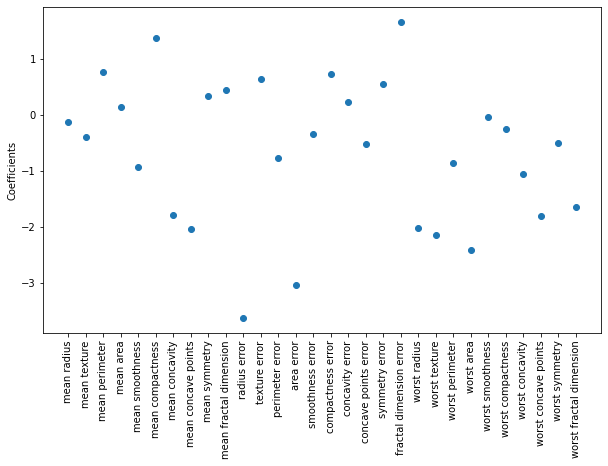

In [16]:
print("Coefficients: \n", theta)

plt.figure(figsize=(10, 6))
plt.plot(theta[1:], 'o')
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=90)
plt.ylabel('Coefficients')
plt.show()


### Evaluating the model
- Precision
- Recall
- F1 Score
- Confusion Matrix

Precision from scratch:  0.9508196721311475
Recall from scratch:  0.9666666666666667


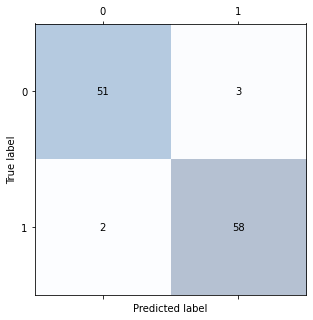

In [17]:
y_pred = 1 / (1 + np.exp(-np.dot(X_test, theta)))
y_pred = [1 if i > threshold else 0 for i in y_pred]

y_pred = np.array(y_pred)
y_test = np.array(y_test)
# y_pred.shape, y_test.shape

# find the number of true positives, true negatives, false positives, and false negatives
def confusion_matrix_values(y_true, y_pred):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        if y_true[i] == 0 and y_pred[i] == 0:
            tn += 1
        if y_true[i] == 0 and y_pred[i] == 1:
            fp += 1
        if y_true[i] == 1 and y_pred[i] == 0:
            fn += 1
    return tp, tn, fp, fn

# calculate precision
def precision(y_true, y_pred):
    tp, tn, fp, fn = confusion_matrix_values(y_true, y_pred)
    return tp / (tp + fp)

# calculate recall
def recall(y_true, y_pred):
    tp, tn, fp, fn = confusion_matrix_values(y_true, y_pred)
    return tp / (tp + fn)

# calculate precision and recall scores for the model
print("Precision from scratch: ", precision(y_test, y_pred))
print("Recall from scratch: ", recall(y_test, y_pred))

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(confusion_matrix(y_test, y_pred), cmap=plt.cm.Blues, alpha=0.3)
for i in range(confusion_matrix(y_test, y_pred).shape[0]):
    for j in range(confusion_matrix(y_test, y_pred).shape[1]):
        ax.text(x=j, y=i, s=confusion_matrix(y_test, y_pred)[i, j], va='center', ha='center')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


### Log-likelihood and Cost Function Plots

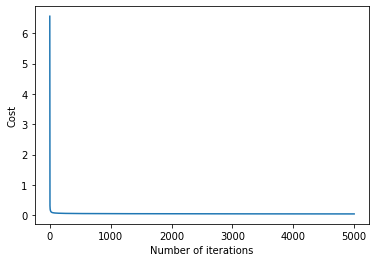

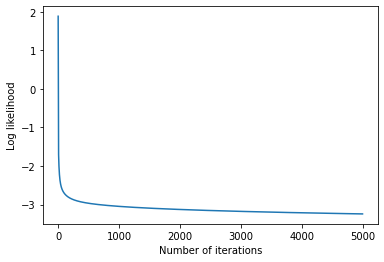

In [18]:
plt.plot(cost)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

plt.plot(np.log(cost))
plt.xlabel("Number of iterations")
plt.ylabel("Log likelihood")
plt.show()


### Conclusions

In [19]:
def y_pred(X, theta, threshold):
    y_pred = 1 / (1 + np.exp(-np.dot(X, theta)))
    y_pred = [1 if i > threshold else 0 for i in y_pred]
    return y_pred

threshold = 0.5
learningrate = 0.0001
num_iters = 5000
theta, cost = multiple_logistic_regression(X_train, y_train, learningrate, num_iters, False)
print(f"\nthreshold: {threshold}, learningrate: {learningrate}, num_iters: {num_iters}")
print("F1 Score: ", 2 * precision_score(y_test, y_pred(X_test, theta, threshold)) * recall_score(y_test, y_pred(X_test, theta, threshold)) / (precision_score(y_test, y_pred(X_test, theta, threshold)) + recall_score(y_test, y_pred(X_test, theta, threshold))))

threshold = 0.5
learningrate = 1
num_iters = 5000
print(f"\nthreshold: {threshold}, learningrate: {learningrate}, num_iters: {num_iters}")
theta, cost = multiple_logistic_regression(X_train, y_train, learningrate, num_iters, False)
print("F1 Score: ", 2 * precision_score(y_test, y_pred(X_test, theta, threshold)) * recall_score(y_test, y_pred(X_test, theta, threshold)) / (precision_score(y_test, y_pred(X_test, theta, threshold)) + recall_score(y_test, y_pred(X_test, theta, threshold))))


threshold = 0.5
learningrate = 0.0001
num_iters = 50000
print(f"\nthreshold: {threshold}, learningrate: {learningrate}, num_iters: {num_iters}")
theta, cost = multiple_logistic_regression(X_train, y_train, learningrate, num_iters, False)
print("F1 Score: ", 2 * precision_score(y_test, y_pred(X_test, theta, threshold)) * recall_score(y_test, y_pred(X_test, theta, threshold)) / (precision_score(y_test, y_pred(X_test, theta, threshold)) + recall_score(y_test, y_pred(X_test, theta, threshold))))


threshold = 0.5
learningrate = 1
num_iters = 50000
print(f"\nthreshold: {threshold}, learningrate: {learningrate}, num_iters: {num_iters}")
theta, cost = multiple_logistic_regression(X_train, y_train, learningrate, num_iters, False)
print("F1 Score: ", 2 * precision_score(y_test, y_pred(X_test, theta, threshold)) * recall_score(y_test, y_pred(X_test, theta, threshold)) / (precision_score(y_test, y_pred(X_test, theta, threshold)) + recall_score(y_test, y_pred(X_test, theta, threshold))))



threshold: 0.5, learningrate: 0.0001, num_iters: 5000
F1 Score:  0.3548387096774193

threshold: 0.5, learningrate: 1, num_iters: 5000
F1 Score:  0.9586776859504132

threshold: 0.5, learningrate: 0.0001, num_iters: 50000
F1 Score:  0.9500000000000001

threshold: 0.5, learningrate: 1, num_iters: 50000
F1 Score:  0.9586776859504132


From the above, it is clear that it would be best to use a high learning rate and a high number of iterations to get the best results. This is because the cost function converges to a minimum after a certain number of iterations. 

Since the function is convex, it is guaranteed to converge to a global minimum. So, the best results are obtained when the number of iterations is high enough to reach the global minimum - though this can be computationally expensive. While a higher learning rate helps reach the global minimum faster in this case. 